### HOMEWORK 4

### WARNINGS :

In [1]:
import warnings
warnings.filterwarnings("ignore")

### LIBRARIES :

In [2]:
import numpy as np
import pandas as pd 
import itertools
from prophet import Prophet
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARIMA, ARMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.ensemble import RandomForestClassifier
import catboost
from catboost import CatBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
import eli5
import lime
import lime.lime_tabular
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from scipy import sparse
import san
from sklearn.feature_selection import chi2,f_classif,mutual_info_classif
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.ar_model import AutoReg
from sklearn.linear_model import LinearRegression
from sklearn.inspection import permutation_importance
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from statsmodels.graphics.tsaplots import plot_predict
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.ensemble import RandomForestRegressor
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt, ExponentialSmoothing

### READ THE DATASET :

In [3]:
df = pd.read_csv('Electric_Production.csv',usecols=['IPG2211A2N','DATE'])
df.columns = df.columns.str.strip()
df

,DATE,IPG2211A2N
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151
...,...,...
392,9/1/2017,98.6154
393,10/1/2017,93.6137
394,11/1/2017,97.3359
395,12/1/2017,114.7212


In [4]:
df.tail()

,DATE,IPG2211A2N
392,9/1/2017,98.6154
393,10/1/2017,93.6137
394,11/1/2017,97.3359
395,12/1/2017,114.7212
396,1/1/2018,129.4048


In [5]:
# Gi preimenuvav kolonite za popregledno da izgledaat

df.rename(columns={'IPG2211A2N':'Electric_Production', 'DATE':'Date'}, inplace=True)
df.head()

,Date,Electric_Production
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151


### EDA ON DATASET :

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 397 non-null    object 
 1   Electric_Production  397 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.3+ KB


In [7]:
# convert na type-ot na data kolonata vo datatime

df["Date"] = pd.to_datetime(df['Date'], errors='coerce')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 397 non-null    datetime64[ns]
 1   Electric_Production  397 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 6.3 KB


In [9]:
df.isnull().sum()

Date                   0
Electric_Production    0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
df.shape

(397, 2)

In [12]:
df.describe()

,Electric_Production
count,397.000000
mean,88.847218
std,15.387834
min,55.315100
25%,77.105200
50%,89.779500
75%,100.524400
max,129.404800


In [13]:
df.columns

Index(['Date', 'Electric_Production'], dtype='object')

In [14]:
df.dtypes

Date                   datetime64[ns]
Electric_Production           float64
dtype: object

In [15]:
# Sakam da vidam kako mi e standardnata devijacija, vo kolonata 'Electric_Production'

column_std = df['Electric_Production'].std()
column_std

15.387833664730909

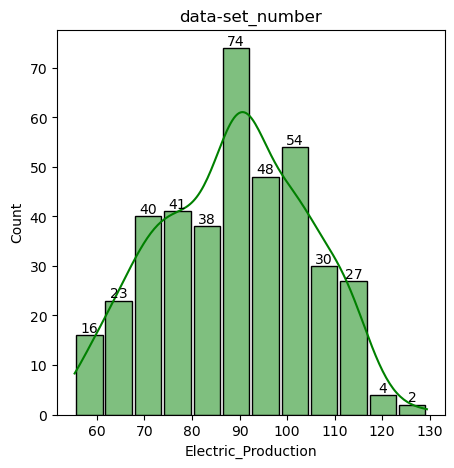

In [16]:
# Preku plot-ot gledam kakva distribucija imam vo kolonata 'Electric_Production'

num_cols = df.select_dtypes(include=np.number).columns.tolist()
for i in num_cols:
    plt.figure(figsize=(5,5))
    y=sns.histplot(x=i, data=df, shrink=.9,stat='count',kde = True,color='green',)
    y.bar_label(y.containers[0])
    plt.title('data-set_number')
    plt.xlabel(i)
    plt.show()

In [17]:
# Pravam analiza vo kolonata date, so cel da vidam koja mi e pocetna i koja mi e posledna data

df_min=df['Date'].min()
df_max= df['Date'].max()
print('First date:', df_min)
print('----------------------------------')
print('Last date:', df_max)

First date: 1985-01-01 00:00:00
----------------------------------
Last date: 2018-01-01 00:00:00


In [18]:
# set-tiranje na index vo data kolonata

df.set_index('Date', inplace=True)
print(df.index)

DatetimeIndex(['1985-01-01', '1985-02-01', '1985-03-01', '1985-04-01',
               '1985-05-01', '1985-06-01', '1985-07-01', '1985-08-01',
               '1985-09-01', '1985-10-01',
               ...
               '2017-04-01', '2017-05-01', '2017-06-01', '2017-07-01',
               '2017-08-01', '2017-09-01', '2017-10-01', '2017-11-01',
               '2017-12-01', '2018-01-01'],
              dtype='datetime64[ns]', name='Date', length=397, freq=None)


<Axes: xlabel='Date'>

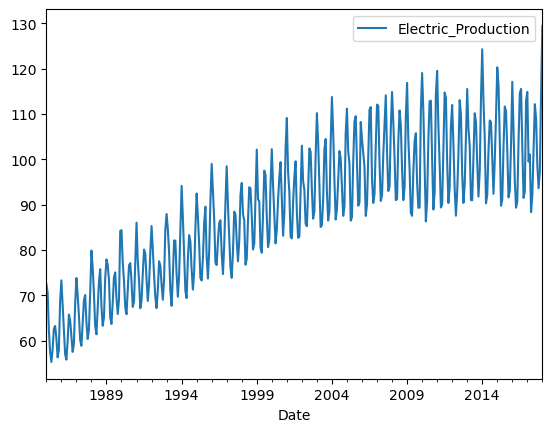

In [19]:
df.plot()

In [20]:
# Cisto nekoj pregled na podatocite vo data kolonata

start_d = '1/1/1985'
end_d = '9/1/2017'

In [21]:
pd.date_range(start_d, end_d, freq = '2M')

DatetimeIndex(['1985-01-31', '1985-03-31', '1985-05-31', '1985-07-31',
               '1985-09-30', '1985-11-30', '1986-01-31', '1986-03-31',
               '1986-05-31', '1986-07-31',
               ...
               '2016-01-31', '2016-03-31', '2016-05-31', '2016-07-31',
               '2016-09-30', '2016-11-30', '2017-01-31', '2017-03-31',
               '2017-05-31', '2017-07-31'],
              dtype='datetime64[ns]', length=196, freq='2M')

In [22]:
df['Electric_Production'] = df['Electric_Production'].astype(float)

In [23]:
df = df.replace(' ', '', regex=True)
df = df.astype(float)
print(df)

            Electric_Production
Date                           
1985-01-01              72.5052
1985-02-01              70.6720
1985-03-01              62.4502
1985-04-01              57.4714
1985-05-01              55.3151
...                         ...
2017-09-01              98.6154
2017-10-01              93.6137
2017-11-01              97.3359
2017-12-01             114.7212
2018-01-01             129.4048

[397 rows x 1 columns]


In [24]:
float_cols = df.select_dtypes(include='float')
df[float_cols.columns] = float_cols.round(4)
print(df)

            Electric_Production
Date                           
1985-01-01              72.5052
1985-02-01              70.6720
1985-03-01              62.4502
1985-04-01              57.4714
1985-05-01              55.3151
...                         ...
2017-09-01              98.6154
2017-10-01              93.6137
2017-11-01              97.3359
2017-12-01             114.7212
2018-01-01             129.4048

[397 rows x 1 columns]


In [25]:
df['Electric_Production'].unique()

array([ 72.5052,  70.672 ,  62.4502,  57.4714,  55.3151,  58.0904,
        62.6202,  63.2485,  60.5846,  56.3154,  58.0005,  68.7145,
        73.3057,  67.9869,  62.2221,  57.0329,  55.8137,  59.9005,
        65.7655,  64.4816,  61.0005,  57.5322,  59.3417,  68.1354,
        73.8152,  70.062 ,  65.61  ,  60.1586,  58.8734,  63.8918,
        68.8694,  70.0669,  64.1151,  60.3789,  62.4643,  70.5777,
        79.8703,  76.1622,  70.2928,  63.2384,  61.4065,  67.1097,
        72.9816,  75.7655,  67.5152,  63.2832,  65.1078,  73.8631,
        77.9188,  76.6822,  73.3523,  65.1081,  63.6892,  68.4722,
        74.0301,  75.0448,  69.3053,  65.8735,  69.0706,  84.1949,
        84.3598,  77.1726,  73.1964,  67.2781,  65.8218,  71.4654,
        76.614 ,  77.1052,  73.061 ,  67.4365,  68.5665,  77.6839,
        86.0214,  77.5573,  73.365 ,  67.15  ,  68.8162,  74.8448,
        80.0928,  79.1606,  73.5743,  68.7538,  72.5166,  79.4894,
        85.2855,  80.1643,  74.5275,  69.6441,  67.1784,  71.2

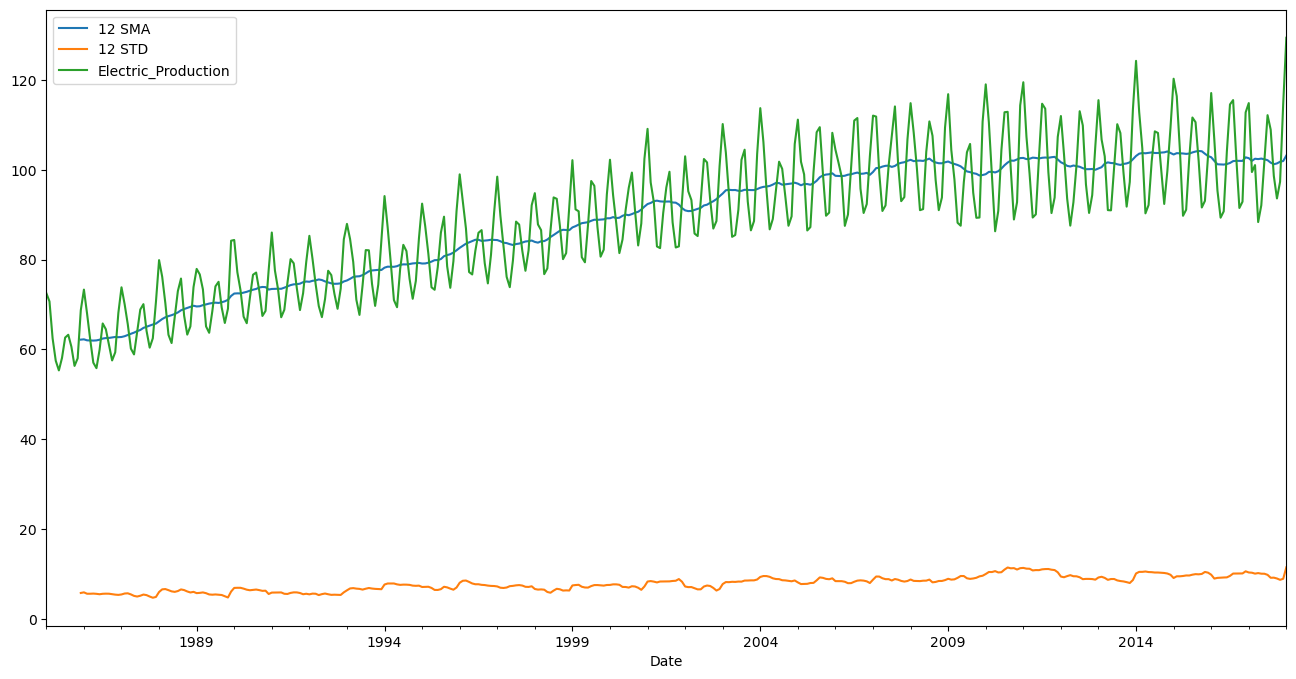

In [26]:
# Preku plot-ot gledame sezonalnost vo podatocite i trend koj se dvizi vo nagorna linija
# pravime 12 mesecen moving average za da go utvrdime trendot
# isto imame prikazano i std da vidime dali imame nekakva varijansa

df['Electric_Production'].rolling(12).mean().plot(label='12 SMA',figsize=(16,8))
df['Electric_Production'].rolling(12).std().plot(label='12 STD')
df['Electric_Production'].plot()
plt.legend()

### SEASONAL DECOMPOSITION (seasonal, trend, residual)

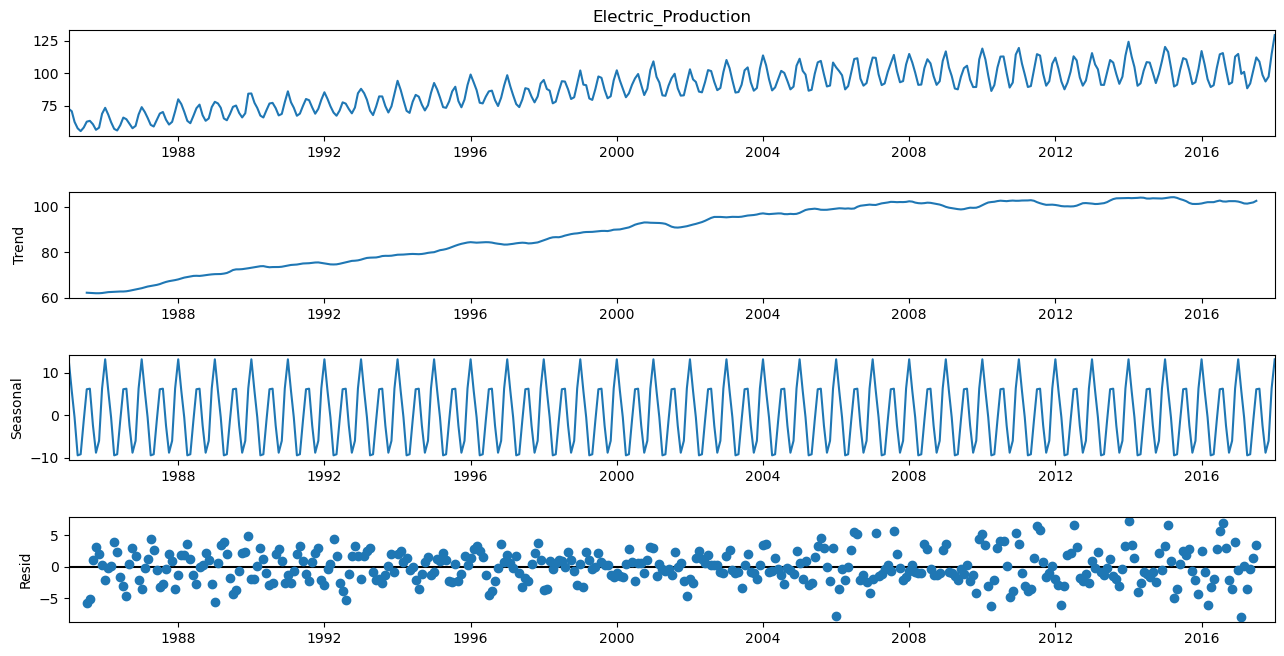

In [27]:
# Tuka pravime sezonalna decomposition, t.e decomposition na modelot, odosno sekoj signal ke go podelime na : 
# - sezonalna komponenta
# - trend 
# - residual 
# sekoj signal mozeme da go dobieme ako gi sobereme site komponenti. 
# Mozeme da izucime model na sekoj poedinecno, da gi sobereme i da gi kombinirame

decomp = seasonal_decompose(df['Electric_Production'])
fig = decomp.plot()
fig.set_size_inches(14,7)

### STATIONARITY TESTING - ADFULLER 

In [28]:
# Tuka pravime stationarity testing so cel da proverime dali time series ni e stacionarna ili ne. 
# za toa da go proverime pravime adfuller test (kade opisuva dali imame period kade ni se menuva vrednosta na promenlivata)
# Critical value so 1%, 5% i 10% vo zavisnost od toa kolku ni e promeneta vrednosta, 
# ni pokazuva dali funkcijata e stacionarna ili ne

fuller_test = adfuller(df['Electric_Production'])
dfoutput = pd.Series(fuller_test[0:4], index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])
for key,value in fuller_test[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Test Statistic                  -2.256990
p-value                          0.186215
Lags Used                       15.000000
Number of Observations Used    381.000000
Critical Value (1%)             -3.447631
Critical Value (5%)             -2.869156
Critical Value (10%)            -2.570827
dtype: float64


In [29]:
def test_p_value(df):
    fuller_test = adfuller(df)
    print('P-value: ',fuller_test[1])
    if fuller_test[1] <= 0.05:
        print('Reject null hypothesis, data is stationary')
    else:
        print('Do not reject null hypothesis, data is not stationary')  

In [30]:
test_p_value(df['Electric_Production'])

# p-value ni e 0,186 i bidejki ni e pogolema od 0,05, 
# nultata hipoteza ne se otfrla i time series ne ni e stacionarna  

P-value:  0.18621469116586759
Do not reject null hypothesis, data is not stationary


### Building ARIMA models

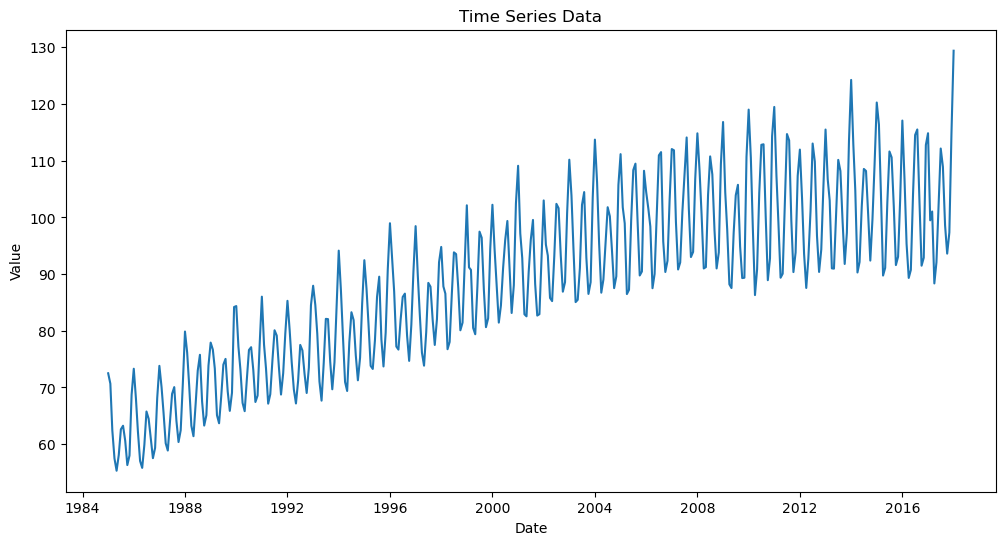

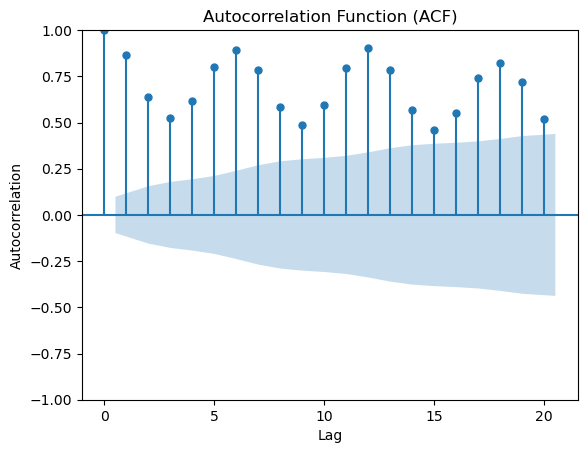

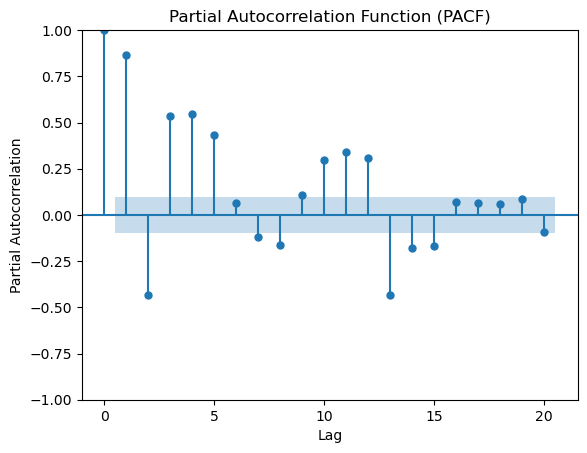

In [31]:
# AutoCorrelation - kolku segmenti da zememe vo minatotot

plt.figure(figsize=(12, 6))
plt.plot(df)
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series Data')
plt.show()

plot_acf(df, lags=20)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF)')
plt.show()

plot_pacf(df, lags=20)
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

### EXPONENTIAL SMOOTHING

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


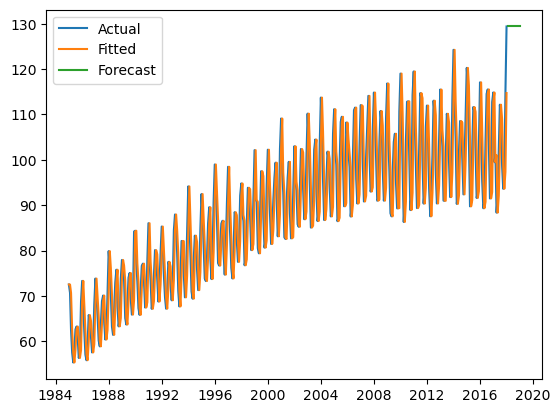

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


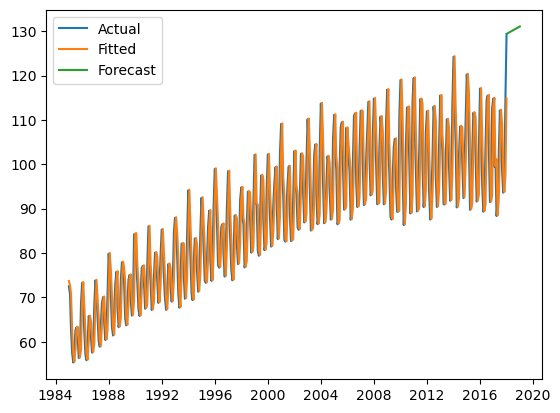

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


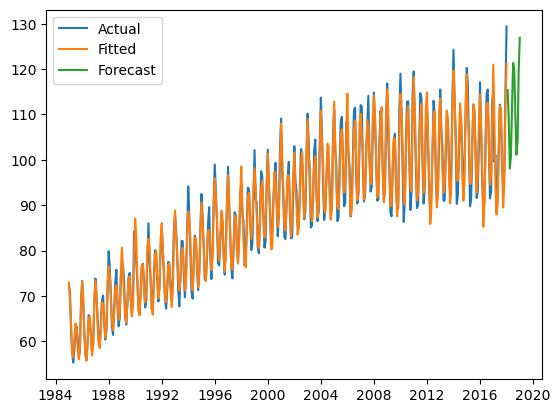

In [32]:
# Exponential smoothing with Actual,Fitted and Forecast

model = SimpleExpSmoothing(df['Electric_Production'])
fit = model.fit()
fcast = fit.forecast(12)

plt.plot(df['Electric_Production'], label='Actual')
plt.plot(fit.fittedvalues, label='Fitted')
plt.plot(fcast, label='Forecast')
plt.legend()
plt.show()

model = Holt(df['Electric_Production'])
fit = model.fit()
fcast = fit.forecast(12)

plt.plot(df['Electric_Production'], label='Actual')
plt.plot(fit.fittedvalues, label='Fitted')
plt.plot(fcast, label='Forecast')
plt.legend()
plt.show()

model = ExponentialSmoothing(df['Electric_Production'], seasonal_periods=12, trend='add', seasonal='add')
fit = model.fit()
fcast = fit.forecast(12)

plt.plot(df['Electric_Production'], label='Actual')
plt.plot(fit.fittedvalues, label='Fitted')
plt.plot(fcast, label='Forecast')
plt.legend()
plt.show()

In [33]:
ts = df['Electric_Production']
print(ts.head(10))
print(type(ts))

Date
1985-01-01    72.5052
1985-02-01    70.6720
1985-03-01    62.4502
1985-04-01    57.4714
1985-05-01    55.3151
1985-06-01    58.0904
1985-07-01    62.6202
1985-08-01    63.2485
1985-09-01    60.5846
1985-10-01    56.3154
Name: Electric_Production, dtype: float64
<class 'pandas.core.series.Series'>


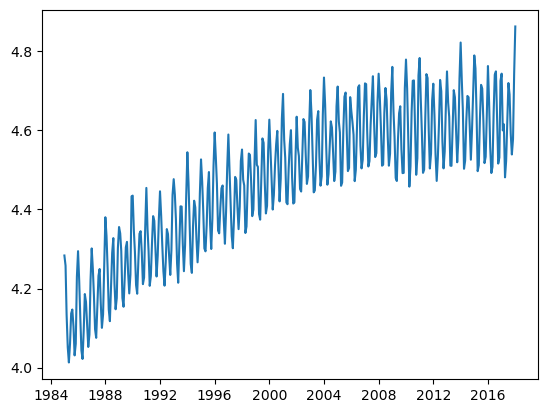

In [34]:
# So pravenje na log, podobro gi gledame vrednostite

ts_log=np.log(ts)
plt.plot(ts_log)

### REMOVING TREND

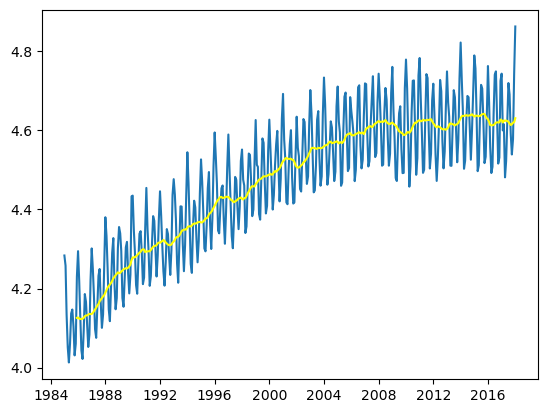

In [35]:
# tuka go trgame trendot, so cel da stigneme do pozicija da imame stacionarnost- neutralnost
# bidejki toa ni e uslov da ni rabotat metodite 

moving_avg = ts_log.rolling(window=12).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color='yellow')

In [36]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(15)

Date
1985-01-01         NaN
1985-02-01         NaN
1985-03-01         NaN
1985-04-01         NaN
1985-05-01         NaN
1985-06-01         NaN
1985-07-01         NaN
1985-08-01         NaN
1985-09-01         NaN
1985-10-01         NaN
1985-11-01         NaN
1985-12-01    0.103961
1986-01-01    0.167724
1986-02-01    0.095629
1986-03-01    0.007329
Name: Electric_Production, dtype: float64

In [37]:
ts_log_moving_avg_diff.dropna(inplace=True)
ts_log_moving_avg_diff.head(10)

Date
1985-12-01    0.103961
1986-01-01    0.167724
1986-02-01    0.095629
1986-03-01    0.007329
1986-04-01   -0.079115
1986-05-01   -0.101472
1986-06-01   -0.033363
1986-07-01    0.055963
1986-08-01    0.034639
1986-09-01   -0.021429
Name: Electric_Production, dtype: float64

### X_train, X_test

In [38]:
# Definiranje na x_train i x_test

X_train = df['Electric_Production'][:len(df)-100]
X_test = df['Electric_Production'][len(df)-100:]

In [39]:
X_train

Date
1985-01-01     72.5052
1985-02-01     70.6720
1985-03-01     62.4502
1985-04-01     57.4714
1985-05-01     55.3151
                ...   
2009-05-01     87.5366
2009-06-01     97.2387
2009-07-01    103.9086
2009-08-01    105.7486
2009-09-01     94.8823
Name: Electric_Production, Length: 297, dtype: float64

In [40]:
X_test

Date
2009-10-01     89.2977
2009-11-01     89.3585
2009-12-01    110.6844
2010-01-01    119.0166
2010-02-01    110.5330
                ...   
2017-09-01     98.6154
2017-10-01     93.6137
2017-11-01     97.3359
2017-12-01    114.7212
2018-01-01    129.4048
Name: Electric_Production, Length: 100, dtype: float64

### AR - AutoRegression

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                             AutoReg Model Results                             
Dep. Variable:     Electric_Production   No. Observations:                  397
Model:                     AutoReg(20)   Log Likelihood                -897.307
Method:                Conditional MLE   S.D. of innovations              2.615
Date:                 Tue, 16 May 2023   AIC                           1838.614
Time:                         15:22:15   BIC                           1925.124
Sample:                     09-01-1986   HQIC                          1872.952
                          - 01-01-2018                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       3.2799      1.065      3.081      0.002       1.193       5.367
Electric_Production.L1      0.6128      0.053     11.572      0.000       0.509     

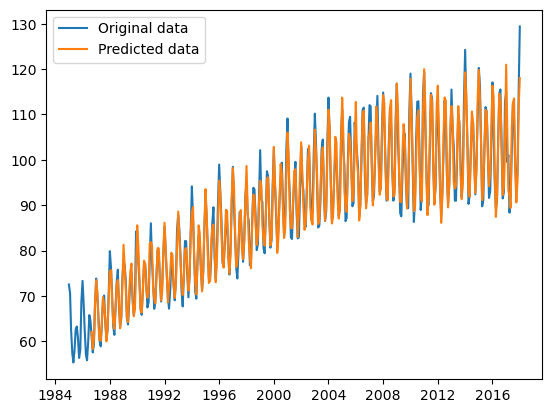

In [41]:
# AU ili AutoRegr e avtoregresija koja uci od minatoto, so avtokorelacija ako se ima 2 minati vrednosti, da se predvidi slednata

n_lags=20 # (window, ni znaci kolku podatoci od prethodno da napravi sporedba)

model = AutoReg(df, lags= n_lags)
result = model.fit()

print(result.summary())

next_value = result.predict(start=len(df), end=len(df))
print('Next value in sequence:', next_value)

plt.plot(df, label='Original data')
plt.plot(result.predict(), label='Predicted data')
plt.legend()
plt.show()

                             AutoReg Model Results                             
Dep. Variable:     Electric_Production   No. Observations:                  297
Model:                     AutoReg(10)   Log Likelihood                -741.720
Method:                Conditional MLE   S.D. of innovations              3.207
Date:                 Tue, 16 May 2023   AIC                           1507.440
Time:                         15:22:25   BIC                           1551.354
Sample:                     11-01-1985   HQIC                          1525.040
                          - 09-01-2009                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       2.6161      1.342      1.950      0.051      -0.014       5.246
Electric_Production.L1      0.8787      0.055     16.047      0.000       0.771     

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


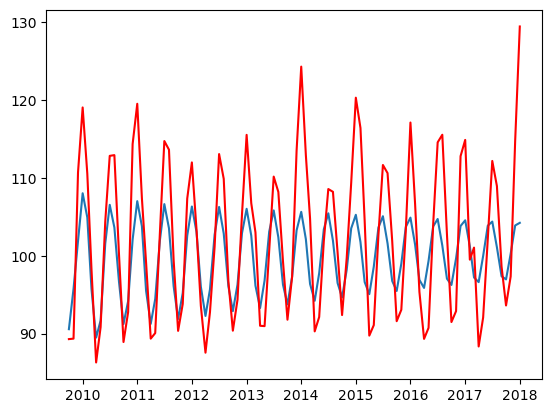

In [42]:
# Definirano na dr.nacin

ar_model = AutoReg(X_train, lags=10).fit()

print(ar_model.summary())

pred = ar_model.predict(start=len(X_train), end=(len(df)-1), dynamic=False)

plt.plot(pred)
plt.plot(X_test, color='red')

In [43]:
# Definiranje na MSE i MAE

mse = mean_squared_error(X_test, pred)
print('MSE: %.3f' % mse)
print("----------------------------------")
mae = mean_absolute_error(X_test, pred)
print('MAE: %.3f' % mae)

MSE: 49.609
----------------------------------
MAE: 5.604


### MA

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                             AutoReg Model Results                             
Dep. Variable:     Electric_Production   No. Observations:                  397
Model:                     AutoReg(20)   Log Likelihood                -897.307
Method:                Conditional MLE   S.D. of innovations              2.615
Date:                 Tue, 16 May 2023   AIC                           1838.614
Time:                         15:22:36   BIC                           1925.124
Sample:                     09-01-1986   HQIC                          1872.952
                          - 01-01-2018                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       3.2799      1.065      3.081      0.002       1.193       5.367
Electric_Production.L1      0.6128      0.053     11.572      0.000       0.509     

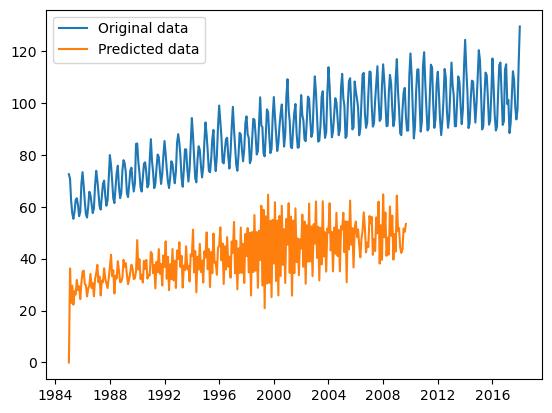

In [44]:
# za MA nemame direktna implementacija

model_arima = SARIMAX(X_train, order=(0,0,1), seasonal_order=(0,0,0,0),freq='MS') 
# 0 ni e komponenta za AU, 
# 0 ne e stazionarnost za odzemanje za stabilizacija na predikcija
# 1 ni e koga ke pravime predikcija ni kazuva deka go zeme samo MA delot
model_fitted = model_arima.fit()

print(result.summary())

predictions = model_fitted.predict(start=X_test.index[0], end=X_test.index[-1])
print(predictions)

plt.plot(df, label='Original data')
plt.plot(model_fitted.predict(), label='Predicted data')
plt.legend()
plt.show()

In [45]:
# Definiranje na MSE i MAE

mse = mean_squared_error(X_test, predictions)
print('MSE: %.3f' % mse)
print("----------------------------------")
mae = mean_absolute_error(X_test, predictions)
print('MAE: %.3f' % mae)

MSE: 10535.076
----------------------------------
MAE: 102.034


### ARIMA

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


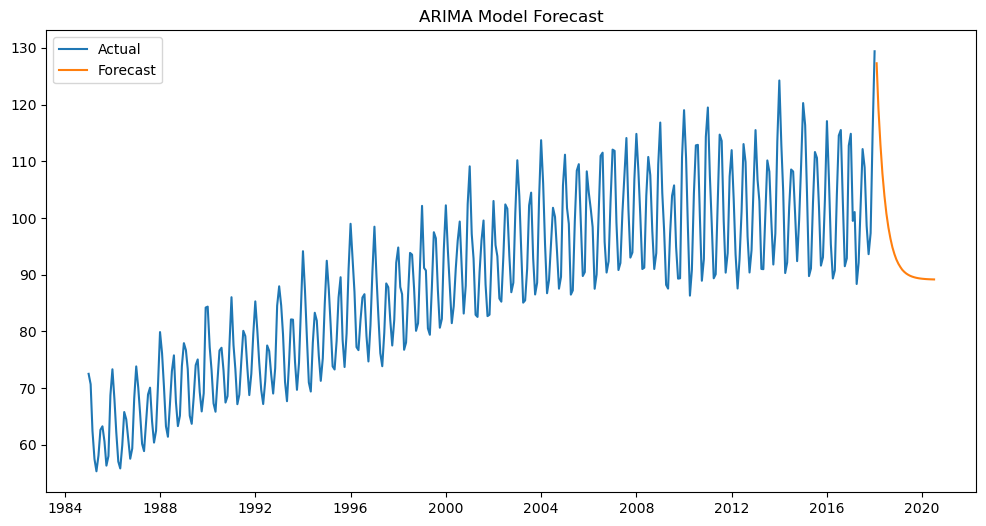

In [46]:
# Plot Actual and Forecast

model = sm.tsa.ARIMA(df, order=(1, 0, 1))  

results_AR = model.fit()

forecast_arima = results_AR.forecast(steps=30)  

plt.figure(figsize=(12, 6))
plt.plot(df.index, df.values, label='Actual')
plt.plot(forecast_arima.index, forecast_arima.values, label='Forecast')
plt.title('ARIMA Model Forecast')
plt.legend()
plt.show()

In [47]:
results_AR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                
===============================================================================
Dep. Variable:     Electric_Production   No. Observations:                  397
Model:                  ARIMA(1, 0, 1)   Log Likelihood               -1292.695
Date:                 Tue, 16 May 2023   AIC                           2593.391
Time:                         15:22:58   BIC                           2609.327
Sample:                     01-01-1985   HQIC                          2599.704
                          - 01-01-2018                                         
Covariance Type:                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         89.1176      2.554     34.888      0.000      84.111      94.124
ar.L1          0.7887      0.040     19.950      0.000       0.711       0.866
ma.L1          0.6194      0.045     13.810      0.000       0.531       0.707
sigma2        39.2029      2.954     13.271      0.000      33.413      44.993
===================================================================================
Ljung-Box (L1) (Q):                   3.35   Jarque-Bera (JB):                 5.15
Prob(Q):                              0.07   Prob(JB):                         0.08
Heteroskedasticity (H):               2.41   Skew:                             0.27
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='Date'>

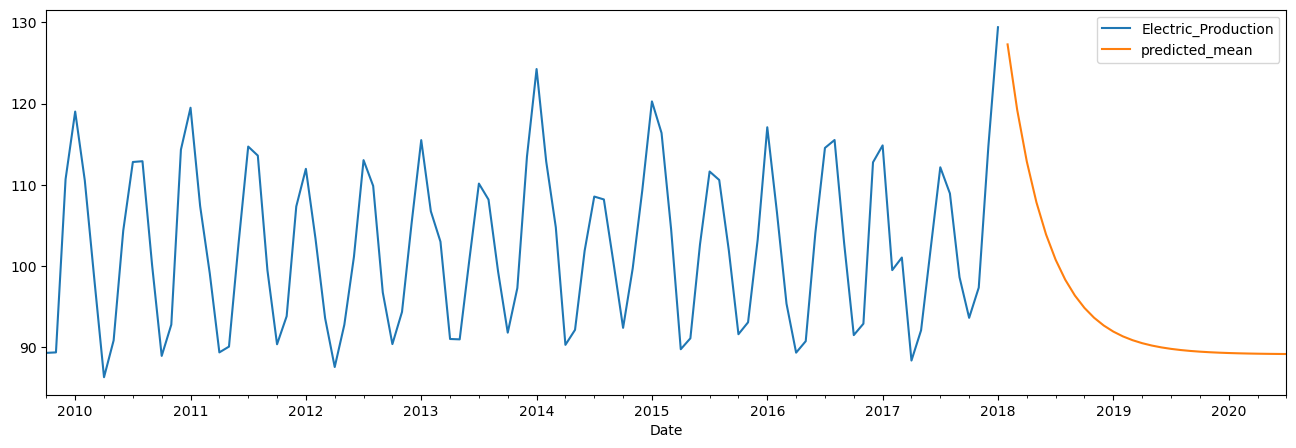

In [48]:
# Plotiranje

X_test.plot(figsize=(16,5),legend = True)
forecast_arima.plot(legend = True)

In [49]:
# Definiranje na MSE i R2 i mean

arima_rmse_error = np.sqrt(mean_squared_error(X_test, forecast_arima))
arima_mse_error = mean_squared_error(X_test, forecast_arima)
mean_value = df.mean()

print(f"MSE Error: {arima_mse_error}\nRMSE Error: {arima_rmse_error}\nMean: {mean_value}")

ValueError: Found input variables with inconsistent numbers of samples: [100, 30]

### SARIMAX

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


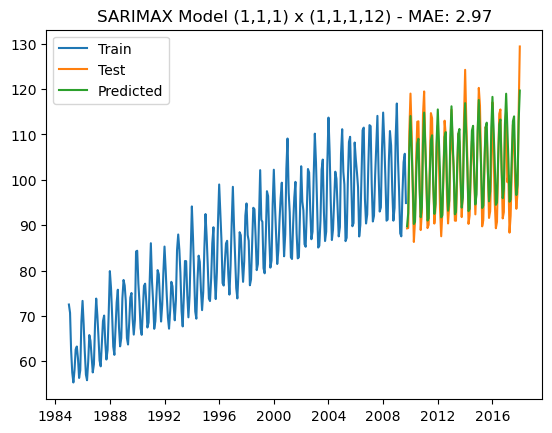

In [50]:
# 1 nacin na definiranje na SARIMAX model

model = SARIMAX(X_train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))

model_fit = model.fit()

predictions = model_fit.forecast(steps=len(X_test))

mae = mean_absolute_error(X_test, predictions)

plt.plot(X_train.index, X_train.values, label='Train')
plt.plot(X_test.index, X_test.values, label='Test')
plt.plot(X_test.index, predictions, label='Predicted')
plt.title(f"SARIMAX Model (1,1,1) x (1,1,1,12) - MAE: {mae:.2f}")
plt.legend()
plt.show()

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self.

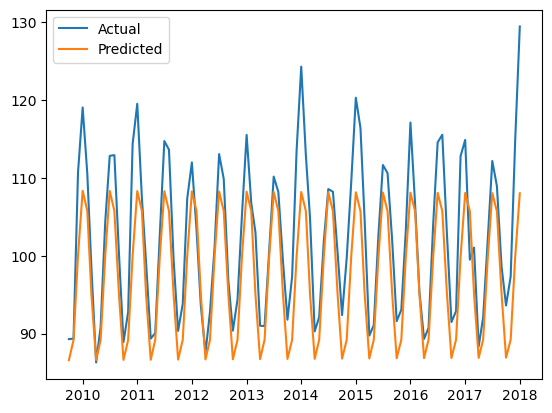

Best combination of p, d, and q: (2, 1, 2)
Mean absolute error: 5.234420183348246


In [51]:
# 2 nacin na definiranje na SARIMAX model

p = range(0, 3)
d = range(0, 3)
q = range(0, 3)
pdq = list(itertools.product(p, d, q))

best_mae = float('inf')
for params in pdq:
    try:                   
        model = SARIMAX(X_train, order=params, seasonal_order=(0, 0, 0, 0))
        result = model.fit()

        predictions = result.predict(start=X_test.index[0], end=X_test.index[-1], dynamic=True)

        mae = mean_absolute_error(X_test, predictions)

        if mae < best_mae:
            best_mae = mae
            best_params = params
            best_result = result
            best_predictions = predictions

    except:
        continue
        
plt.plot(X_test, label='Actual')
plt.plot(best_predictions, label='Predicted')
plt.legend()
plt.show()

print(f"Best combination of p, d, and q: {best_params}")
print(f"Mean absolute error: {best_mae}")